In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display
import IPython.display as ipd
import os
import sklearn
import json
import pickle

In [6]:
train_data = pd.read_csv('/kaggle/input/birdclef-2022/train_metadata.csv')
train_data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [7]:
taxonomy = pd.read_csv('/kaggle/input/birdclef-2022/eBird_Taxonomy_v2021.csv')
taxonomy.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [8]:
rated_train_data = train_data[train_data['rating'] >= 3]
rated_train_data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg
5,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,4.0,16:30,https://www.xeno-canto.org/207432,afrsil1/XC207432.ogg


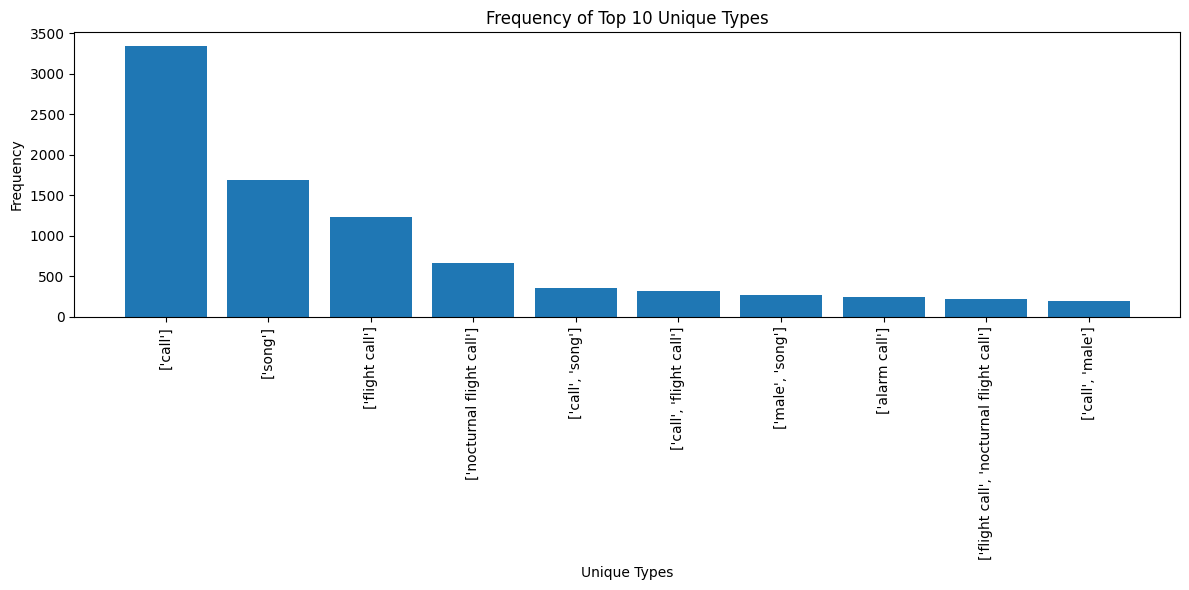

In [9]:
exploded_type = rated_train_data.explode('type')
type_counts = exploded_type['type'].value_counts()

#top 10 most frequent types
top_10_types = type_counts.head(10)

# Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_types.index, top_10_types.values)
plt.xlabel("Unique Types")
plt.ylabel("Frequency")
plt.title("Frequency of Top 10 Unique Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
filtered_data = rated_train_data[rated_train_data['type'].isin(top_10_types.values)]

In [11]:
import os
import pandas as pd
import librosa

# Define the directory where audio files are stored
base_dir = '/kaggle/input/birdclef-2022/train_audio'

# Create a full path for each audio file
rated_train_data['full_path'] = rated_train_data['filename'].apply(lambda x: os.path.join(base_dir, x))

# Get the top 10 types (assuming 'type' column exists)
exploded_type = rated_train_data.explode('type')
top_10_types = exploded_type['type'].value_counts().head(10).index.tolist()

# Filter the data for only the top 10 types
filtered_data = rated_train_data[rated_train_data['type'].isin(top_10_types)]

# Select one random example of each type
one_example_per_type = filtered_data.groupby('type').apply(lambda x: x.sample(1)).reset_index(drop=True)

# Function to calculate audio duration
def calculate_duration(file_path):
    try:
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            return 0
        
        audio, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=audio, sr=sr)
        return duration
    
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return 0

# Calculate duration for the selected examples
one_example_per_type['audio_duration'] = one_example_per_type['full_path'].apply(calculate_duration)

# Display the dataset with the audio durations
print(one_example_per_type[['type', 'filename', 'audio_duration']])


                                       type              filename  \
0                            ['alarm call']   lesyel/XC344795.ogg   
1                   ['call', 'flight call']   skylar/XC143109.ogg   
2                          ['call', 'male']  mallar3/XC348244.ogg   
3                          ['call', 'song']   perfal/XC133325.ogg   
4                                  ['call']   gnwtea/XC332290.ogg   
5  ['flight call', 'nocturnal flight call']   brnowl/XC544496.ogg   
6                           ['flight call']   snogoo/XC294523.ogg   
7                          ['male', 'song']   norcar/XC142555.ogg   
8                 ['nocturnal flight call']   comsan/XC587842.ogg   
9                                  ['song']   towsol/XC570380.ogg   

   audio_duration  
0       14.880000  
1       30.792000  
2       13.975500  
3      106.187750  
4       16.326531  
5        6.192000  
6       35.056312  
7       34.056000  
8        7.941219  
9      152.568000  


In [12]:
PATH_DATASET = "/kaggle/input/birdclef-2022"

In [13]:
import os
import pandas as pd

path_csv = os.path.join(PATH_DATASET, "train_metadata.csv")
train_meta = pd.read_csv(path_csv).sample(frac=1)
display(train_meta.head())

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
7225,houspa,[],['call'],37.1379,-7.6303,Passer domesticus,House Sparrow,Nelson Conceição,Creative Commons Attribution-NonCommercial-Sha...,4.5,07:01,https://www.xeno-canto.org/530698,houspa/XC530698.ogg
7430,iiwi,"['hawama', 'iiwi', 'warwhe1']",['call'],20.7229,-156.3071,Drepanis coccinea,Iiwi,Ulf Elman,Creative Commons Attribution-NonCommercial-Sha...,3.5,15:04,https://www.xeno-canto.org/385038,iiwi/XC385038.ogg
3736,comsan,[],"['alarm call', 'flight call']",52.0612,5.3710,Actitis hypoleucos,Common Sandpiper,Aat Schaftenaar,Creative Commons Attribution-NonCommercial-Sha...,2.0,02:00,https://www.xeno-canto.org/434766,comsan/XC434766.ogg
10129,norsho,[],"['call', 'display', 'female', 'male', 'song', ...",60.2409,25.2100,Spatula clypeata,Northern Shoveler,Hannu Varkki,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:40,https://www.xeno-canto.org/665150,norsho/XC665150.ogg
11992,rorpar,[],['call'],43.5912,7.0101,Psittacula krameri,Rose-ringed Parakeet,Joss Deffarges,Creative Commons Attribution-NonCommercial-Sha...,1.5,15:03,https://www.xeno-canto.org/309918,rorpar/XC309918.ogg


In [14]:
pip install noisereduce

Note: you may need to restart the kernel to use updated packages.


In [15]:
import torch
import torchaudio
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import noisereduce
import matplotlib.pyplot as plt
import numpy as np
import librosa
from math import ceil
from pprint import pprint
from torch import Tensor
from torch.utils.data import DataLoader


SPECTROGRAM_PARAMS = dict(
    sample_rate=32_000,
    hop_length=640,
    n_fft=800,
    n_mels=128,
    fmin=20,
    fmax=16_000,
    win_length=512
)
PCEN_PARAS = dict(
    time_constant=0.06,
    eps=1e-6,
    gain=0.8,
    power=0.25,
    bias=10,
)


@torch.no_grad()
def create_spectrogram(
    fname: str,
    reduce_noise: bool = False,
    frame_size: int = 5,
    frame_step: int = 2,
    spec_params: dict = SPECTROGRAM_PARAMS,
) -> list:
    waveform, sample_rate = librosa.core.load(fname, sr=spec_params["sample_rate"], mono=True)
    if reduce_noise:
        waveform = noisereduce.reduce_noise(
            y=waveform,
            sr=sample_rate,
            time_constant_s=float(frame_size),
            time_mask_smooth_ms=250,
            n_fft=spec_params["n_fft"],
            use_tqdm=False,
            n_jobs=2,
        )

    step = int(frame_step * sample_rate)
    size = int(frame_size * sample_rate)
    count = ceil((len(waveform) - size) / float(step))
    frames = []
    for i in range(max(1, count)):
        begin = i * step
        frame = waveform[begin:begin + size]
        if len(frame) < size:
            if i == 0:
                rep = round(float(size) / len(frame))
                frame = frame.repeat(int(rep))
            elif len(frame) < (size * 0.33):
                continue
            else:
                frame = waveform[-size:]
        frames.append(frame)

    spectrograms = []
    for frm in frames:
        sg = librosa.feature.melspectrogram(
            y=frm,
            sr=sample_rate,
            n_fft=spec_params["n_fft"],
            win_length=spec_params["win_length"],
            hop_length=spec_params["hop_length"],
            n_mels=spec_params["n_mels"],
            fmin=spec_params["fmin"],
            fmax=spec_params["fmax"],
            power=1,
        )
#         sg = librosa.pcen(sg, sr=sample_rate, hop_length=spec_params["hop_length"], **PCEN_PARAS)
        sg = librosa.amplitude_to_db(sg, ref=np.max)
        spectrograms.append(np.nan_to_num(sg))
    return spectrograms

/kaggle/input/birdclef-2022/train_audio/apapan/XC27331.ogg
-80.0 -9.536743e-07
-80.0 -1.9073486e-06
-80.0 -1.9073486e-06
-79.7877 0.0
-79.7877 0.0
-80.0 -9.536743e-07
-80.0 -9.536743e-07
-80.0 -9.536743e-07
-80.0 0.0
-79.85989 -1.9073486e-06
-79.51876 -1.9073486e-06
-80.0 0.0
-80.0 0.0
-80.0 0.0
-76.26518 -1.9073486e-06


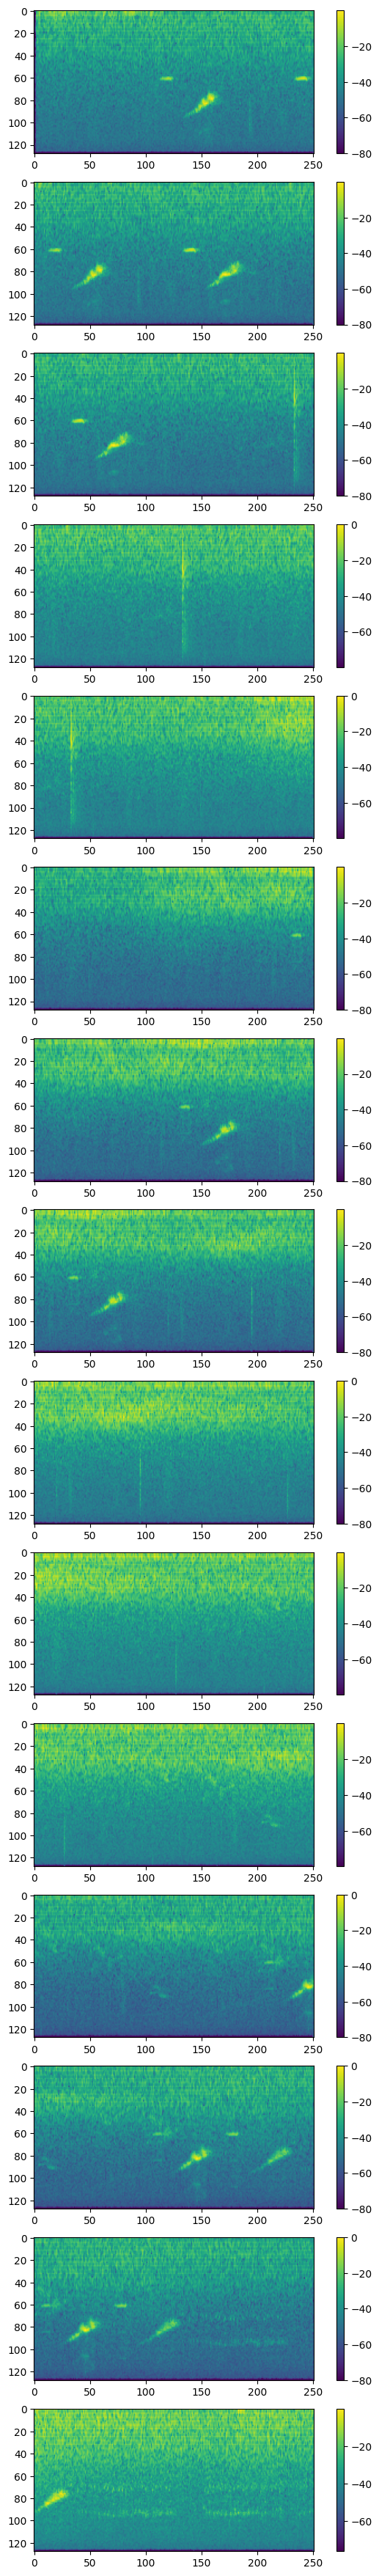

In [16]:
path_audio = os.path.join(PATH_DATASET, "train_audio", "apapan/XC27331.ogg")
# path_audio = os.path.join(PATH_DATASET, "train_audio", "elepai/XC27344.ogg")
# path_audio = os.path.join(PATH_DATASET, "train_audio", "hawgoo/XC210217.ogg")
print(path_audio)
sgs = create_spectrogram(path_audio, reduce_noise=False)


fig, axarr = plt.subplots(nrows=len(sgs), figsize=(8, 3 * len(sgs)))
for i, sg in enumerate(sgs):
    print(np.min(sg), np.max(sg))
    im = axarr[i].imshow(sg)  # librosa
    plt.colorbar(im, ax=axarr[i])

In [18]:
from functools import partial
from joblib import Parallel, delayed
import os
from tqdm import tqdm

# Define the convert_and_export function
def convert_and_export(filename, path_in, path_out):
    # Your logic for converting and exporting audio files to images
    pass  # Replace with actual implementation

# Now use partial to create a new function
_convert_and_export = partial(
    convert_and_export,
    path_in=os.path.join(PATH_DATASET, "train_audio"),
    path_out="train_images",
)

# Assuming train_meta is defined and contains "filename"
_ = Parallel(n_jobs=3)(delayed(_convert_and_export)(fn) for fn in tqdm(train_meta["filename"]))

100%|██████████| 14852/14852 [00:00<00:00, 96273.55it/s]
